**Задача 1.**

Создайте класс по работе с тригонометрическими функциями. В классе должны быть реализованы функции вычисления:
- косинуса;
- синуса;
- тангенса;
- арксинуса;
- арккосинуса;
- арктангенса;
- перевода из градусов в радианы.

In [6]:
import math

class Trigonometry:
    @staticmethod
    def cos(x):
        return math.cos(x)
    @staticmethod
    def sin(x):
        return math.sin(x)
    @staticmethod
    def tg(x):
        return math.tan(x)
    @staticmethod
    def arctan(x):
        return math.atan(x)
    @staticmethod
    def arcsin(x):
        return math.asin(x)
    @staticmethod
    def arccos(x):
        return math.acos(x)
    @staticmethod
    def radians(x):
        return math.radians(x)

n = Trigonometry.radians(90)
print(Trigonometry.arcsin(Trigonometry.sin(n)))

1.5707963267948966


**Задача 2.**

Дан класс, описывающий бинарное дерево.
 
Реализуйте в классе функцию для вставки нового элемента в дерево по следующим правилам:

- Левое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
- Правое поддерево узла содержит только узлы со значениями меньше, чем значение в узле.
- Каждое из левого и правого поддеревьев также должно быть бинарным деревом поиска.
- Не должно быть повторяющихся узлов.

Метод вставки сравнивает значение узла с родительским узлом и решает куда доваить элемент (в левое или правое поддерево). Перепишите, метод PrintTree для печати полной версии дерева.

In [13]:
class Tree:
    
    def __init__(self, data):
        self.left = None
        self.right = None
        self.data = data
        
    def push(self,data):
        if data < self.data:
            if self.left:
                self.left.push(data)
            else:
                self.left = Tree(data)
        else:
            if data == self.data:
                return
            if self.right:
                self.right.push(data)
            else:
                self.right = Tree(data)
                
    def PrintTree(self,n=0):
        if self.right:
            self.right.PrintTree(n + 5)
        print(' ' * n + str(self.data))
        if self.left:
            self.left.PrintTree(n + 5)
            
tree = Tree(10)
tree.push(8)
tree.push(11)
tree.push(105)
tree.push(150)
tree.push(100)
tree.PrintTree()

               150
          105
               100
     11
10
     8


**Задача 3.**

Постройте модель регрессии для данных из предыдущей рабочей тетради.Для примера можно взять потребления газа (в миллионах галлонов) в 48 штатах США или набор данных о качестве красного вина:  

https://raw.githubusercontent.com/likarajo/petrol_consumption/master/data/petrol_consumption.csv
https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv  

Постройте прогноз. Оцените точность модели.

Mean Squared Error: 0.4565401760266475
Mean Absolute Error: 0.5393885420938427


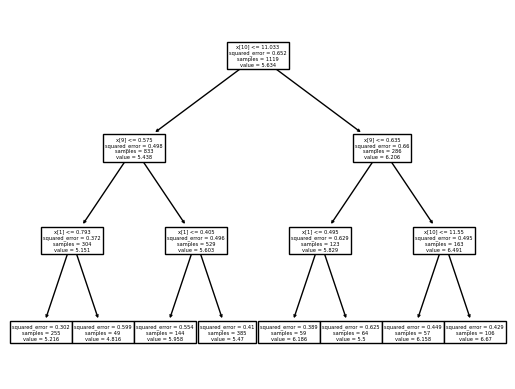

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import metrics

url = "C:\\Users\\Admin\\Desktop\\winequality-red.csv"
dataset = pd.read_csv(url)
dataset.head()

x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
regressor = DecisionTreeRegressor(max_depth = 3)
regressor.fit(x_train,y_train)
tree.plot_tree(regressor)

y_pred = regressor.predict(x_test)

df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

print('Mean Squared Error:',metrics.mean_squared_error(y_test,y_pred))
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))